In [1]:
# package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class nyt_nmf():
    
    def __init__(self, num_word = 3012, num_doc = 8447):
        self.nw = num_word
        self.nd = num_doc
        
        # load words
        self.words = pd.read_csv('nyt_vocab.dat', header = None)
        
        # construct M
        self.build_X()
        
    def build_X(self):
        # initiate M
        self.X = np.ndarray((self.nw,self.nd))
        # load file
        docs = np.loadtxt('nyt_data.txt', dtype='str', delimiter='\n')
        # fill entry
        for i_doc in range(docs.shape[0]):
            doc = docs[i_doc].split(',')
            for el in doc:
                idx, val = el.split(':')
                self.X[int(idx)-1, i_doc] = int(val)
    
    def NMF(self, rank = 25, loop = 100):
        # initialize W and H with given rank and uniform 
        self.W = np.random.uniform(1, 2, size = (self.nw, rank))
        self.H = np.random.uniform(1, 2, size = (rank, self.nd))
        
        # obj
        self.obj = np.zeros(100)
        
        # update
        for i in range(1, loop+1):
            if (i== 1) or (i % 10 == 0): print(i, ' iteration' , end = '\r')
            # update H
            purple = self.X / (self.W.dot(self.H) + 1e-16)
            pink = self.W.T / np.sum(self.W.T, axis = 1, keepdims = True)
            self.H = self.H * (pink.dot(purple))
            
            # update W
            purple = self.X / (self.W.dot(self.H) + 1e-16)
            cyan = self.H.T / np.sum(self.H.T, axis = 0, keepdims= True)
            self.W = self.W * (purple.dot(cyan))
            
            # obj
            WH = self.W.dot(self.H)
            self.obj[i-1] = np.sum((np.log(1/(WH + 1e-16)) * self.X ) + WH)
    
    def extract_dict(self):
        self.dict = {}
        W = self.W / np.sum(self.W, axis = 0, keepdims = True)
        for col in range(W.shape[1]):
            idx = np.argsort(W[:,col])[::-1]
            tmp_pd = pd.DataFrame({'Words':self.words.iloc[idx[:10],0],
                                   'Weights': W[idx[:10],col]})
            self.dict[col] = tmp_pd
            print(tmp_pd)
            print()

In [3]:
p2 = nyt_nmf()

In [4]:
p2.NMF()

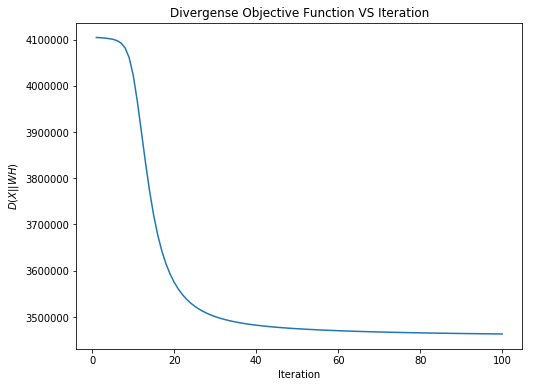

In [5]:
_ = plt.figure(figsize=(8,6))
_ = sns.lineplot(y = p2.obj, x = range(1, p2.obj.shape[0]+1))
_ = plt.title('Divergense Objective Function VS Iteration')
_ = plt.xlabel('Iteration')
_ = plt.ylabel('$D(X||WH)$')
_ = plt.savefig('p2a.png')

In [6]:
p2.extract_dict()

         Words   Weights
0      company  0.041928
69   executive  0.017720
36    business  0.015547
79        sell  0.015031
131       sale  0.013931
33   president  0.012899
113      share  0.012765
157      chief  0.011609
34      market  0.011304
112        buy  0.010912

           Words   Weights
265     computer  0.018730
74        system  0.012498
163  information  0.011648
0        company  0.011397
78       service  0.011102
427   technology  0.010716
219         site  0.009470
13       program  0.008911
865     internet  0.008498
173   television  0.008399

         Words   Weights
139      study  0.015601
360   research  0.011136
201  different  0.007629
107        far  0.007030
343     decade  0.006999
584  professor  0.006841
666    science  0.006523
217  important  0.006440
359     expert  0.006079
838  scientist  0.005817

          Words   Weights
132    campaign  0.022250
75    political  0.018878
120       party  0.016126
319   candidate  0.015401
216    election  0.0